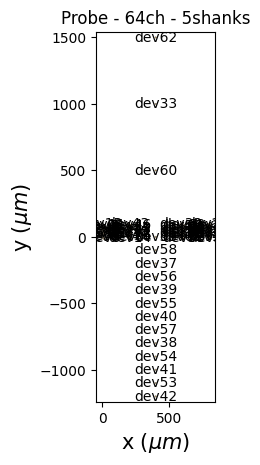

<Figure size 10000x10000 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

from probeinterface import Probe, ProbeGroup
from probeinterface import generate_linear_probe, generate_multi_shank, generate_multi_columns_probe
from probeinterface import combine_probes
from probeinterface.plotting import plot_probe
from probeinterface.io import write_prb


# generate a 4 shanks with 12trodes
probe0 = generate_multi_columns_probe(num_columns = 2,
                                      num_contact_per_column = [6,6],
                                      y_shift_per_column = -10,
                                      ypitch = 20, xpitch = math.sqrt(300),
                               contact_shapes='square',
                               contact_shape_params={'width': 12})
probe0.move([-math.sqrt(300)/2, 0])
probe1 = probe0.copy()
probe1.move([200, 0])

# Generate other 2 12-trode shanks
probe3 = probe1.copy()
probe3.move([400,0])
probe4 = probe3.copy()
probe4.move([200,0])

#Generate central shank
probe2 = Probe(ndim=2, si_units='um')

positions = []
for i in range(16):
    if i <13:
        positions.append([400, i * -100])
    else: 
        positions.append([400, (i-12) * 500])
probe2.set_contacts(positions=positions, shapes='circle', shape_params={'radius': 5})


# generate single central shank


multi_shank = combine_probes([probe0, probe1, probe2, probe3, probe4])

# DEVICE INDICES REFER TO THE AXONA CHANNELS (i.e. the ones seen on the oscilloscope, not anything to do with the probe)
# DEVICE CHANNEL AS PLOTTED IS ALSO EQUAL TO THE CHANNEL IN THE RECORDING OBJECT
device_indices0 = [7, 13, 10, 4, 8, 14, 9, 3, 11, 5, 6, 12]
device_indices0 = [i-1 for i in device_indices0]

device_indices1 = [1, 35, 16, 45, 2, 44, 15, 37, 48, 46, 33, 47]
device_indices1 = [i-1 for i in device_indices1]

device_indices2 = [36, 59, 38, 57, 40, 56, 41, 58, 39, 55, 42, 54, 43, 61, 34, 63]
device_indices2 = [i-1 for i in device_indices2]

device_indices3 = [62, 32, 52, 17, 53, 31, 60, 18, 51, 49, 50, 64]
device_indices3 = [i-1 for i in device_indices3]

device_indices4 = [20, 26, 29, 23, 19, 25, 30, 24, 28, 22, 21, 27]
device_indices4 = [i-1 for i in device_indices4]

multi_shank.set_device_channel_indices(device_indices0+device_indices1+device_indices2+device_indices3+device_indices4)
plot_probe(multi_shank, with_channel_index = False, with_device_index = True)

plt.show()

probegroup = ProbeGroup()
probegroup.add_probe(multi_shank)
write_prb('5x12-16_buz.prb', probegroup)